<a href="https://colab.research.google.com/github/vishva2410/used_car_price_prediction/blob/main/Used_car_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder,LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
import xgboost as xg
from sklearn.metrics import accuracy_score,mean_squared_error,r2_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LinearRegression

In [8]:
df = pd.read_csv('used_cars.csv')
df.head(10)

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,Utility Police Interceptor Base,2013,"51,000 mi.",E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,"$10,300"
1,Hyundai,Palisade SEL,2021,"34,742 mi.",Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,"$38,005"
2,Lexus,RX 350 RX 350,2022,"22,372 mi.",Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,NaN,"$54,598"
3,INFINITI,Q50 Hybrid Sport,2015,"88,900 mi.",Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,"$15,500"
4,Audi,Q3 45 S line Premium Plus,2021,"9,835 mi.",Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,NaN,"$34,999"
5,Acura,ILX 2.4L,2016,"136,397 mi.",Gasoline,2.4 Liter,F,Silver,Ebony.,None reported,NaN,"$14,798"
6,Audi,S3 2.0T Premium Plus,2017,"84,000 mi.",Gasoline,292.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,6-Speed A/T,Blue,Black,None reported,Yes,"$31,000"
7,BMW,740 iL,2001,"242,000 mi.",Gasoline,282.0HP 4.4L 8 Cylinder Engine Gasoline Fuel,A/T,Green,Green,None reported,Yes,"$7,300"
8,Lexus,RC 350 F Sport,2021,"23,436 mi.",Gasoline,311.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,6-Speed A/T,Black,Black,None reported,Yes,"$41,927"
9,Tesla,Model X Long Range Plus,2020,"34,000 mi.",NaN,534.0HP Electric Motor Electric Fuel System,A/T,Black,Black,None reported,Yes,"$69,950"


In [9]:
df['accident'].replace(np.nan,'None reported',inplace=True)

<ipython-input-9-5aa246dbea22>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['accident'].replace(np.nan,'None reported',inplace=True)


In [13]:
df['fuel_type'].replace(np.nan,'not_known',inplace=True)

<ipython-input-13-2c4178bf9040>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['fuel_type'].replace(np.nan,'not_known',inplace=True)


In [11]:
df['clean_title'].replace(np.nan,'No',inplace=True)

<ipython-input-11-2f1469349d28>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['clean_title'].replace(np.nan,'No',inplace=True)


In [14]:
df.isnull().sum()

,0
brand,0
model,0
model_year,0
milage,0
fuel_type,0
engine,0
transmission,0
ext_col,0
int_col,0
accident,0


In [15]:
print(df.dtypes)

brand           object
model           object
model_year       int64
milage          object
fuel_type       object
engine          object
transmission    object
ext_col         object
int_col         object
accident        object
clean_title     object
price           object
dtype: object


In [17]:
x = df.drop('price',axis = 1)
y = df['price']

In [18]:
df.head(3)

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,Utility Police Interceptor Base,2013,"51,000 mi.",E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,"$10,300"
1,Hyundai,Palisade SEL,2021,"34,742 mi.",Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,"$38,005"
2,Lexus,RX 350 RX 350,2022,"22,372 mi.",Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,No,"$54,598"


In [29]:
te  = TfidfVectorizer()
'''
x['accident'] = te.fit_transform(x['accident']).toarray()
x['fuel_type'] = te.fit_transform(x['fuel_type']).toarray()
x['clean_title'] = te.fit_transform(x['clean_title']).toarray()
x['engine']= te.fit_transform(x['engine']).toarray()
x['transmission']= te.fit_transform(x['transmission']).toarray()
x['model']= te.fit_transform(x['model']).toarray()
'''
# done exicuting
x['model']= te.fit_transform(x['model']).toarray()

In [24]:
x["milage"] = x["milage"].str.replace(",", "").str.replace("mi.", "").str.strip().astype(int)

In [31]:
le = LabelEncoder()
x['brand']= le.fit_transform(x['brand'])

In [32]:
x['ext_col'] = le.fit_transform(x['ext_col'])
x['int_col'] = le.fit_transform(x['int_col'])
x['clean_title'] = le.fit_transform(x['clean_title'])

In [36]:
y = y.str.replace(",", "").str.replace("$", "").str.strip().astype(int)

In [37]:
y

,price
0,10300
1,38005
2,54598
3,15500
4,34999
...,...
4004,349950
4005,53900
4006,90998
4007,62999


In [39]:
se = StandardScaler()
x= se.fit_transform(x)
y = se.fit_transform(y.values.reshape(-1,1))

In [40]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.1,random_state=32)

Model LinearRegression():
Mean Squared Error: 0.4022068816284052
R-squared: 0.18376934600394523


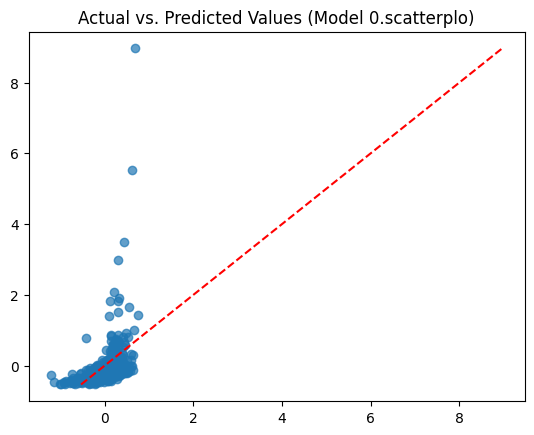

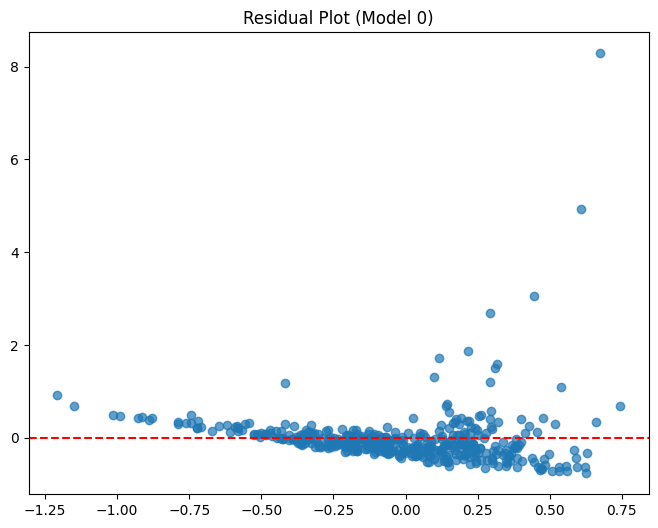

Model XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...):
Mean Squared Error: 0.13248988974356748
R-squared: 0.7311276502395381


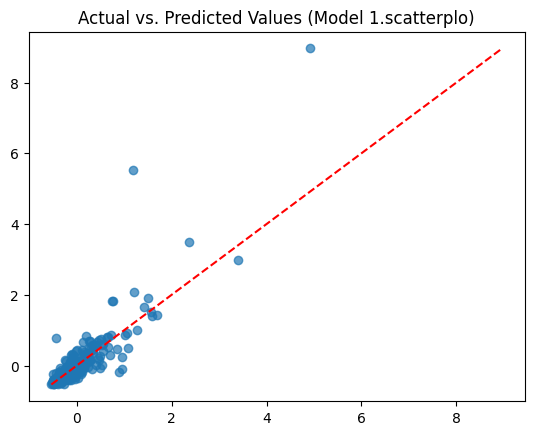

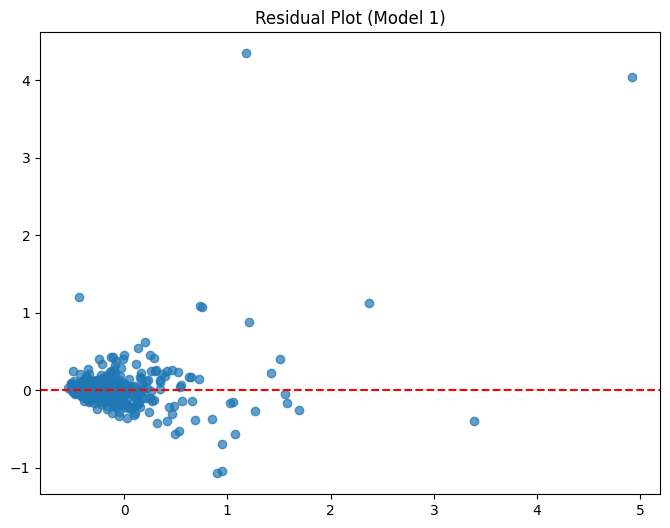

In [74]:
model = [LinearRegression(),xg.XGBRegressor()]
for i in range(2):
  model[i].fit(x_train,y_train)
  y_pred = model[i].predict(x_test)
  # Reshape y_pred to be (401, 1) to match y_test
  y_pred = y_pred.reshape(-1, 1)
  mse = mean_squared_error(y_test, y_pred)
  r2 = r2_score(y_test, y_pred)
  print(f"Model {model[i]}:")
  print(f"Mean Squared Error: {mse}")
  print(f"R-squared: {r2}")
  '''
  plt.figure(figsize=(8, 6))
  plt.scatter(y_test, y_pred, alpha=0.7)
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')  # Diagonal line
  plt.xlabel("Actual Values")
  plt.ylabel("Predicted Values")
  '''
  plt.scatter(y_pred, y_test, alpha=0.7)
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
  plt.title(f"Actual vs. Predicted Values (Model {i}.scatterplo)")
  plt.show()

  residuals = y_test - y_pred
  plt.figure(figsize=(8, 6))
  # Use y_pred.ravel() to flatten it for scatter plot.
  plt.scatter(y_pred.ravel(), residuals.ravel(), alpha=0.7)
  plt.axhline(y=0, color='red', linestyle='--')
  plt.title(f"Residual Plot (Model {i})")
  plt.show()